In [5]:
import scipy.stats as ss
from collections import Counter
import math 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

Reading the Data

In [7]:
# reading the data and also checking the computation time

%time data = pd.read_csv('C:/Users/Dear Gabriel/Documents/Data/Machine_Learning/data.csv')

print(data.shape)

Wall time: 1.07 s
(18207, 89)


Analyzing the Data

In [8]:
# checking the first 5 rows and columns

data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
# checking if the data contains any NULL value

data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [16]:
# decsribing the data

data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.112924,2.947438,2.360356,19.508046,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.393554,0.659591,0.755394,15.935210,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [17]:
data.head() # To look first 5 values

#data.tail() # to look last 5 values

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


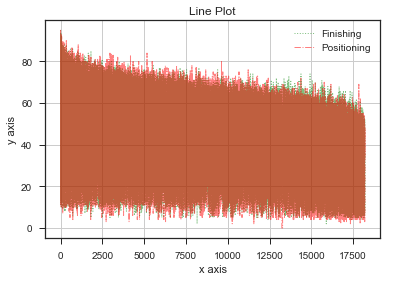

In [18]:
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Finishing.plot(kind = 'line', color = 'g',label = 'Finishing',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Positioning.plot(color = 'r',label = 'Positioning',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Scatter is better when there is correlation between two variables

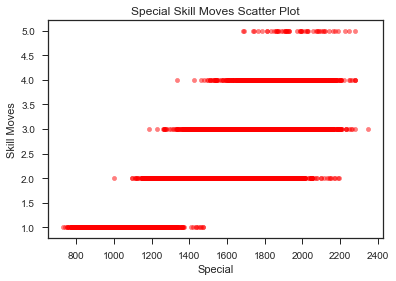

In [19]:
# x = Special, y = Skill Moves
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.plot(kind='scatter', x='Special', y='Skill Moves',alpha = 0.5,color = 'red')
plt.xlabel('Special')              # label = name of label
plt.ylabel('Skill Moves')
plt.title('Special Skill Moves Scatter Plot')  # title = title of plot
plt.show()          # for showing plot

In [20]:
Histogram is better when we need to see distribution of numerical data.

SyntaxError: invalid syntax (<ipython-input-20-3ded9e476ad4>, line 1)

Histogram is better when we need to see distribution of numerical data.

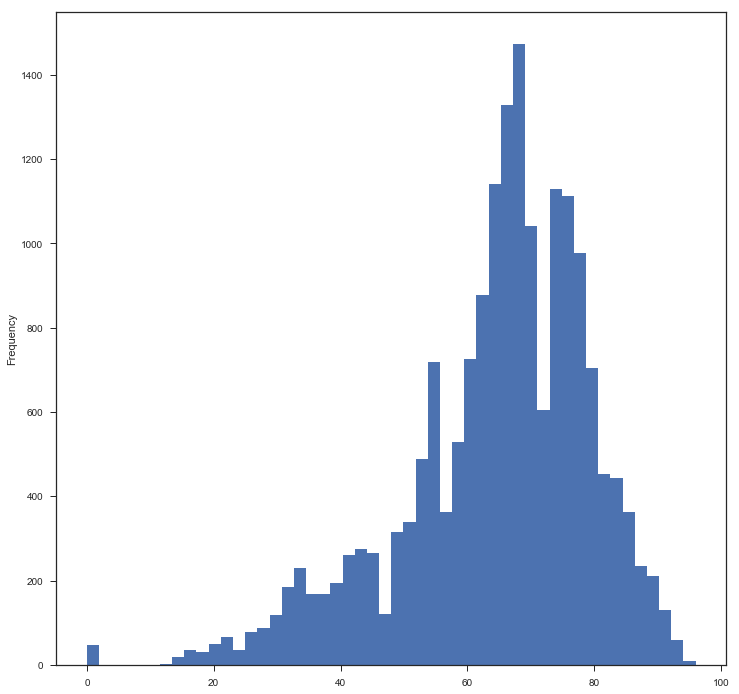

In [21]:
# bins = number of bar in figure
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.SprintSpeed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [22]:
# clf() = cleans it up again you can start a fresh
data.SprintSpeed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 432x288 with 0 Axes>

Lets practice some other properties like keys(), values(), update, add, check, remove key, remove all entries and remove dicrionary.

In [23]:
#create dictionary and look its keys and values
dictionary = {'istanbul' : 'besiktas','paris' : 'psg'}
print("dictionary:",dictionary)
print(dictionary.keys())
print(dictionary.values())

dictionary: {'istanbul': 'besiktas', 'paris': 'psg'}
dict_keys(['istanbul', 'paris'])
dict_values(['besiktas', 'psg'])


In [24]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['istanbul'] = "galatasaray"    # update existing entry
print(dictionary)
dictionary['madrid'] = "realmadrid"       # Add new entry
print(dictionary)

{'istanbul': 'galatasaray', 'paris': 'psg'}
{'istanbul': 'galatasaray', 'paris': 'psg', 'madrid': 'realmadrid'}


In [25]:
del dictionary['istanbul']              # remove entry with key 'spain'
print(dictionary)
print('paris' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)

{'paris': 'psg', 'madrid': 'realmadrid'}
True
{}


In [26]:
# In order to run all code you need to take comment this line
# del dictionary         # delete entire dictionary     
print(dictionary)       # it gives error because dictionary is deleted

{}


PANDAS
What we need to know about pandas?

CSV: comma - separated values

In [27]:
series = data['Club']        # data['Club'] = series
print(type(series))
data_frame = data[['Agility']]  # data[['Agility']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
# Comparison operator
print(21 > 2)
print(3!=2) #It means that 3 is not equal to 2
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


 Two options for litering the data

In [31]:
# 1 - Filtering Pandas data frame
x = data['Age']>43     # There are only 3 footballers who have older than 43
data[x]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4741,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K
17726,17726,51963,T. Warner,44,https://cdn.sofifa.org/players/4/19/51963.png,Trinidad & Tobago,https://cdn.sofifa.org/flags/93.png,53,53,Accrington Stanley,...,46.0,19.0,15.0,14.0,48.0,56.0,56.0,60.0,44.0,0
18183,18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,0


In [32]:
# 2 - Filtering pandas with logical_and
# There are only 2 footballers who are older than 43 and smaller Potential value than 60
data[np.logical_and(data['Age']>43, data['Potential']<60 )]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17726,17726,51963,T. Warner,44,https://cdn.sofifa.org/players/4/19/51963.png,Trinidad & Tobago,https://cdn.sofifa.org/flags/93.png,53,53,Accrington Stanley,...,46.0,19.0,15.0,14.0,48.0,56.0,56.0,60.0,44.0,0
18183,18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,0


In [33]:
data.columns  # now we can look every columns' names

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [34]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Age']>43) & (data['Potential']<60) ]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17726,17726,51963,T. Warner,44,https://cdn.sofifa.org/players/4/19/51963.png,Trinidad & Tobago,https://cdn.sofifa.org/flags/93.png,53,53,Accrington Stanley,...,46.0,19.0,15.0,14.0,48.0,56.0,56.0,60.0,44.0,0
18183,18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,0


DIAGNOSE DATA for CLEANING
We have to diagnose and clean data before exploring.

In [35]:
data.head(10) # first 10 player
#data.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [36]:
#data.shape()  # shape gives number of rows and columns in a tuble our data is 18207X89

In [37]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Club_Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null fl

In [38]:
# For example lets look frequency of players Nationality
print(data['Nationality'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 1662 player from England,1198 player from Germany etc.

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Bermuda                    2
Chad                       2
Dominican Republic         2
Nicaragua     

In [39]:
# for example mean of age is 25.12
data.describe() #ignore null entries

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.112924,2.947438,2.360356,19.508046,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.393554,0.659591,0.755394,15.935210,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


VISUAL EXPLORATORY DATA ANALYSIS

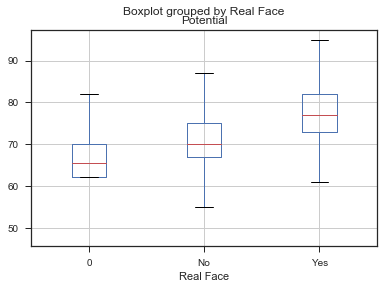

In [40]:
# For example: compare Potential of players that are real face  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Potential',by = 'Real Face')

We tidy data with melt(). Describing melt is confusing. Therefore lets make example to understand it.

In [41]:
# Firstly we create new data from fifa data to explain melt more easily.
data_new = data.head()    #  only with 5 rows into new data
data_new

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [42]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Nationality','Club'])
melted

,Name,variable,value
0,L. Messi,Nationality,Argentina
1,Cristiano Ronaldo,Nationality,Portugal
2,Neymar Jr,Nationality,Brazil
3,De Gea,Nationality,Spain
4,K. De Bruyne,Nationality,Belgium
5,L. Messi,Club,FC Barcelona
6,Cristiano Ronaldo,Club,Juventus
7,Neymar Jr,Club,Paris Saint-Germain
8,De Gea,Club,Manchester United
9,K. De Bruyne,Club,Manchester City


PIVOTING DATA
Reverse of melting.

In [43]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Club,Nationality
Name,,
Cristiano Ronaldo,Juventus,Portugal
De Gea,Manchester United,Spain
K. De Bruyne,Manchester City,Belgium
L. Messi,FC Barcelona,Argentina
Neymar Jr,Paris Saint-Germain,Brazil


CONCATENATING DATA
We can concatenate two dataframe

In [44]:
#  lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
6,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
7,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
8,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
9,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [45]:
ta1 = data['Nationality'].head()
data2= data['Value'].head()
data3= data['Name'].head()
conc_data_col = pd.concat([data3,data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,Name,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value
0,L. Messi,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,€110.5M
1,Cristiano Ronaldo,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,€77M
2,Neymar Jr,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,€118.5M
3,De Gea,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,€72M
4,K. De Bruyne,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,€102M


In [46]:
# lets convert object(str) to categorical and int to float.
data['Nationality'] = data['Nationality'].astype('category')
data['Age'] = data['Age'].astype('float')

In [47]:
#  Nationality is converted from object to categorical
# And Age ,s converted from int to float
data.dtypes.head(10)

Unnamed: 0        int64
ID                int64
Name             object
Age             float64
Photo            object
Nationality    category
Flag             object
Overall           int64
Potential         int64
Club             object
dtype: object

In [48]:
Lets look at does player data have nan value?
# As you can see there are 18207  entries. However Club has 17966 non-null object so it has 241 null object.
data.info()

Object `value` not found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null float64
Photo                       18207 non-null object
Nationality                 18207 non-null category
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Club_Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves    

In [ ]:
Lets look at does player data have nan value

In [49]:
# Lets check club
data["Club"].value_counts(dropna =False)
# As you can see, there are 241 NAN value

No Club                      241
Newcastle United              33
Arsenal                       33
RC Celta                      33
Atlético Madrid               33
Eintracht Frankfurt           33
CD Leganés                    33
Valencia CF                   33
AS Monaco                     33
Liverpool                     33
Rayo Vallecano                33
Chelsea                       33
Cardiff City                  33
Southampton                   33
Manchester City               33
Fortuna Düsseldorf            33
Real Madrid                   33
TSG 1899 Hoffenheim           33
Everton                       33
Empoli                        33
Manchester United             33
Tottenham Hotspur             33
Borussia Dortmund             33
FC Barcelona                  33
Frosinone                     33
Burnley                       33
Wolverhampton Wanderers       33
West Ham United               32
Lazio                         32
Huddersfield Town             32
          

In [50]:
#  Lets check with assert statement
# Assert statement:
assert 1==1 # return nothing because it is true

 some exemples to illustre our learning from above

In [55]:
threshold1 = data.Dribbling.mean()
print(threshold1)
data["fin_level"] = ["high" if i > threshold1 else "low" for i in data.Finishing]
data.loc[:10,["fin_level","Finishing"]]

55.37100060576021


,fin_level,Finishing
0,high,95.0
1,high,94.0
2,high,87.0
3,low,13.0
4,high,82.0
5,high,84.0
6,high,72.0
7,high,93.0
8,high,60.0
9,low,11.0


In [56]:
#lets find all the turkish player
turk= data.Nationality == 'Turkey'
data[turk]

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Club_Logo,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,fin_level
383,383,O. Toprak,28.0,Turkey,81,82,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/22.png,€16M,€59K,...,82.0,83.0,83.0,11.0,8.0,11.0,12.0,15.0,€28.4M,low
449,449,H. Çalhanoğlu,24.0,Turkey,80,84,Milan,https://cdn.sofifa.org/teams/2/light/47.png,€19.5M,€89K,...,62.0,56.0,56.0,9.0,14.0,11.0,6.0,10.0,€34.6M,high
659,659,C. Tosun,27.0,Turkey,79,80,Everton,https://cdn.sofifa.org/teams/2/light/7.png,€14.5M,€105K,...,33.0,34.0,15.0,12.0,14.0,12.0,12.0,9.0,€28.6M,high
705,705,N. Şahin,29.0,Turkey,79,79,SV Werder Bremen,https://cdn.sofifa.org/teams/2/light/38.png,€10M,€32K,...,74.0,74.0,77.0,13.0,10.0,13.0,12.0,11.0,€17M,high
721,721,B. Yılmaz,32.0,Turkey,79,79,Trabzonspor,https://cdn.sofifa.org/teams/2/light/436.png,€10M,€41K,...,29.0,29.0,26.0,14.0,15.0,11.0,8.0,12.0,€20M,high
725,725,E. Belözoğlu,37.0,Turkey,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,€4M,€23K,...,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M,high
853,853,O. Özyakup,25.0,Turkey,78,81,Beşiktaş JK,https://cdn.sofifa.org/teams/2/light/327.png,€13M,€47K,...,60.0,65.0,64.0,7.0,10.0,9.0,15.0,13.0,€25.7M,high
908,908,E. Çolak,27.0,Turkey,77,77,Al Wehda,https://cdn.sofifa.org/teams/2/light/112408.png,€9.5M,€27K,...,35.0,44.0,43.0,7.0,12.0,15.0,6.0,7.0,€16.2M,high
930,930,E. Akbaba,25.0,Turkey,77,80,Galatasaray SK,https://cdn.sofifa.org/teams/2/light/325.png,€11M,€51K,...,57.0,55.0,45.0,14.0,11.0,6.0,11.0,8.0,€21.7M,high
977,977,O. Kıvrak,30.0,Turkey,77,77,Trabzonspor,https://cdn.sofifa.org/teams/2/light/436.png,€5.5M,€24K,...,18.0,13.0,16.0,78.0,74.0,67.0,75.0,81.0,€11M,low


Let do some works in DataFrame

In [57]:
# data frames from dictionary
country = ["Spain","France"]
team = ["realmadrid","psg"]
list_label = ["country","team"]
list_col = [country,team]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,team
0,Spain,realmadrid
1,France,psg


In [58]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,team,capital
0,Spain,realmadrid,madrid
1,France,psg,paris


In [59]:
# Broadcasting
df["value"] = 0 #Broadcasting entire column
df

,country,team,capital,value
0,Spain,realmadrid,madrid,0
1,France,psg,paris,0


...into Data Analysis

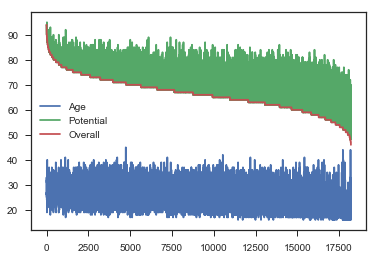

In [60]:
# Plotting all data 
data1 = data.loc[:,["Age","Potential","Overall"]]
data1.plot()


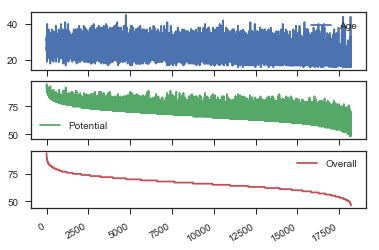

In [61]:
# subplots
data1.plot(subplots = True)
plt.show()

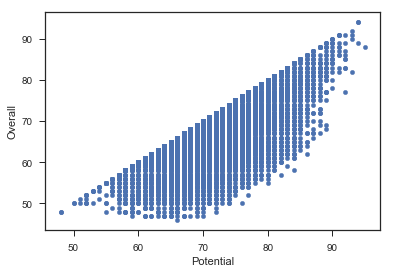

In [62]:
# scatter plot  
data1.plot(kind = "scatter",x="Potential",y = "Overall")
plt.show()

C:\Users\Dear Gabriel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


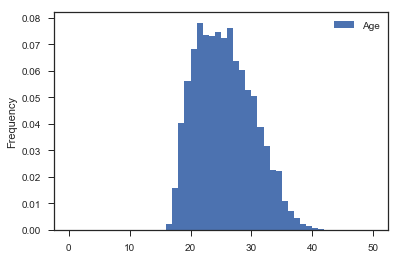

In [63]:
# hist plot  
data1.plot(kind = "hist",y = "Age",bins = 50,range= (0,50),normed = True)

C:\Users\Dear Gabriel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Dear Gabriel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<module 'matplotlib.pyplot' from 'C:\\Users\\Dear Gabriel\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

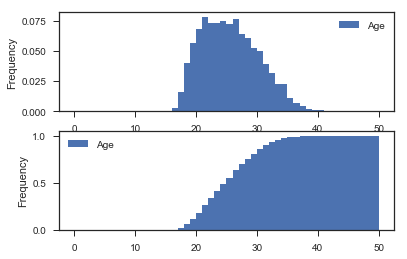

In [65]:
 #histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Age",bins = 50,range= (0,50),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Age",bins = 50,range= (0,50),normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt